In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#Reduce warnings when dividing pandas columns by each other.
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#Read QC
undf = pd.read_csv("data/qc_unknown_unknown_reduced.tsv", sep='\t')
#Split per status
undf_pass = undf[undf['Status'] == 'PASS']
undf_pass_rel = undf_pass
del undf_pass_rel['Status']
del undf_pass_rel['Length']
undf_fail = undf[undf['Status'] == 'FAIL']
undf_fail_rel = undf_fail
del undf_fail_rel['Status']
del undf_fail_rel['Length']
#Create relative plots (number of hit / totalhits)
#Pass:
undf_pass_rel['Contig'] = undf_pass['Contig']
undf_pass_rel['Virus'] = undf_pass['Virus']/undf_pass['Total']
undf_pass_rel['Eukaryota'] = undf_pass['Eukaryota']/undf_pass['Total']
undf_pass_rel['Bacteria'] = undf_pass['Bacteria']/undf_pass['Total']
undf_pass_rel['Archaea'] = undf_pass['Archaea']/undf_pass['Total']
undf_pass_rel['Unknown'] = undf_pass['Unknown']/undf_pass['Total']
undf_pass_rel.dropna()
#Fail:
undf_fail_rel['Contig'] = undf_fail['Contig']
undf_fail_rel['Virus'] = undf_fail['Virus']/undf_fail['Total']
undf_fail_rel['Eukaryota'] = undf_fail['Eukaryota']/undf_fail['Total']
undf_fail_rel['Bacteria'] = undf_fail['Bacteria']/undf_fail['Total']
undf_fail_rel['Archaea'] = undf_fail['Archaea']/undf_fail['Total']
undf_fail_rel['Unknown'] = undf_fail['Unknown']/undf_fail['Total']
undf_fail_rel.dropna()
#Melt:
undf_pass_rel_melt = pd.melt(undf_pass_rel.drop(['Total'], axis=1),id_vars='Contig')
undf_fail_rel_melt = pd.melt(undf_fail_rel.drop(['Total'], axis=1),id_vars='Contig')

Text(0.5,1,'Passed')

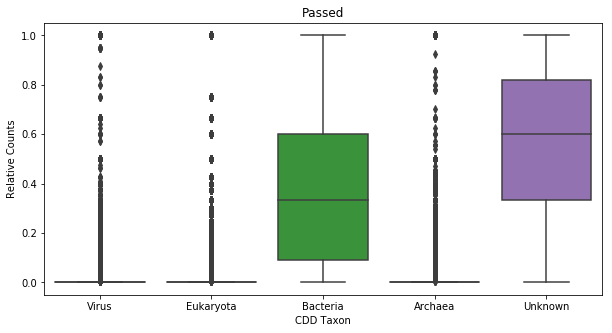

In [95]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='variable',y='value',data=undf_pass_rel_melt)
ax.set(xlabel='CDD Taxon', ylabel='Relative Counts')
ax.set_title('Passed')

Text(0.5,1,'Failed')

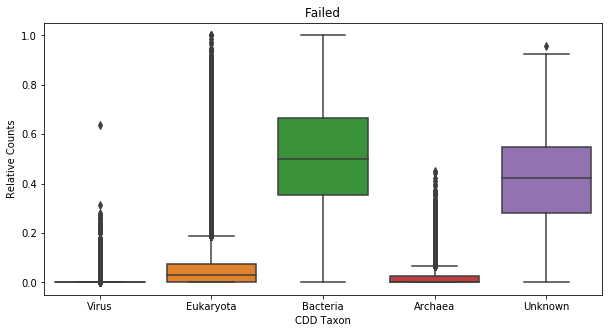

In [96]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='variable',y='value',data=undf_fail_rel_melt)
ax.set(xlabel='CDD Taxon', ylabel='Relative Counts')
ax.set_title('Failed')

Text(0.5,1,'Distributions of contig Length vs Number of CDD hits')

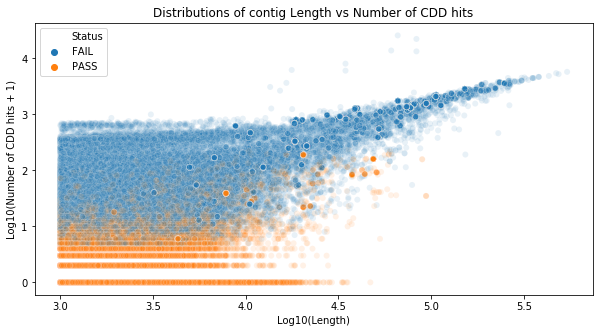

In [9]:
plt.figure(figsize=(10, 5))
#Logtransform length
undf['loglen'] = np.log10(undf['Length'])
undf['loghit'] = np.log10(undf['Total']+ 1)
#Scatterplot
ax = sns.scatterplot(data=undf, x='loglen',y='loghit',hue='Status', alpha=0.1)
ax.set(xlabel='Log10(Length)', ylabel='Log10(Number of CDD hits + 1)')
ax.set_title('Distributions of contig Length vs Number of CDD hits')

In [87]:
#Create the numbers to see how many in the 3 categories of Failed:
## Category 1: > 3 Eukaryotic CDDs AND > 3 Bacterial CDDs, no Viral CDDs 
## Category 2: > 3 Eukaryotic CDDs
## Category 3: > 3 Bacterial CDDs, no Viral CDDs
FailTOTAL = len(undf[undf['Status'] == 'FAIL'])
FailEU = len(undf[(undf['Status'] == 'FAIL') & (undf['Eukaryota'] > 3)])
FailBAC = len(undf[(undf['Status'] == 'FAIL') & (undf['Virus'] == 0) & (undf['Bacteria'] > 3)])
FailBOTH = FailEU + FailBAC - Totalfail

#Pass categories:
## Category 1: Dark matter
## Category 2: >0 Viral domains
## Category 3: Rest
PassTOTAL = len(undf[undf['Status'] == 'PASS'])
PassDARK = len(undf[(undf['Status'] == 'PASS') & (undf['Total'] == 0)])
PassVIR = len(undf[(undf['Status'] == 'PASS') & (undf['Virus'] > 0)])
PassREST = PassTOTAL - PassDARK - PassVIR

#Wrap in dic
Passfaildic = {'Fail Category 1':FailBOTH, 'Fail Category 2':FailEU - FailBOTH, 'Fail Category 3':FailBAC - FailBOTH, 'Pass Category 1':PassDARK, 'Pass Category 2':PassVIR, 'Pass Category 3':PassREST} 
Totaldic = {'Total Failed':FailTOTAL, 'Total Passed':PassTOTAL}
#Put in df
passfaildf = pd.DataFrame.from_dict(Passfaildic, orient='index')
passfaildf.columns = ['Categories']
totaldf = pd.DataFrame.from_dict(Totaldic, orient='index')
totaldf.columns = ['Total']

<Figure size 1080x360 with 0 Axes>

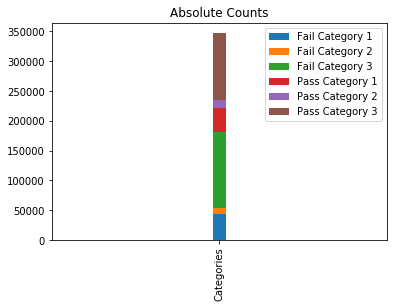

In [97]:
plt.figure(figsize=(15, 5))
passfaildf.T.plot(kind='bar', stacked=True, width=0.02, title='Absolute Counts')

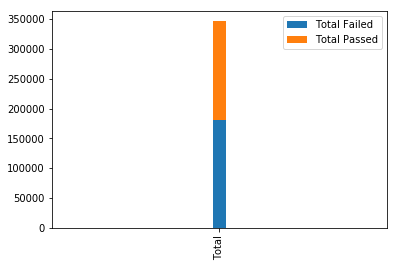

In [89]:
totaldf.T.plot(kind='bar',stacked=True,width=0.02)